# Heart Disease Prediction – EDA & Baseline ML

**Goal:** Predict heart disease status (Result: 1/0) using patient vitals and lab measurements.

**Sections:** Read Data → Cleaning → IQR/Outliers → Visualization → Modeling (Logistic Regression, Random Forest)

> To run locally: `pip install -r requirements.txt` and run cells top-to-bottom.


### **CONTENT :**

1. [Read Data](#1)
2. [Data Cleaning](#2)
3. [Data IQR](#3)
4. [Data Visual](#4)
5. [Modeling](#5)

<a id="1"></a> <br>
> ## **1. Read Data**

1. Age: Age of the patient (in years).

2. Gender: Gender of the patient. 1 for male, 0 for female.

3. Heart rate: Heart rate in beats per minute (BPM).

4. Systolic blood pressure: Systolic component of blood pressure.

5. Diastolic blood pressure: Diastolic component of blood pressure.

6. Blood sugar: Level of blood sugar.

7. CK-MB: Level of creatine kinase-MB (indicator of myocardial damage).

8. Troponin: Level of troponin (indicator of cardiac muscle damage).

9. Result: Diagnostic outcome. Indicated as positive or negative. Descriptive percentages are also provided for different classes of results

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
import warnings

In [4]:

data=pd.read_csv(r"C:\Users\user\Downloads\Medicaldataset.csv")
data

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


<a id="2"></a><br>
> ## **2. Data Cleaning**

In [5]:
data.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [6]:
data.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

In [5]:
data.dtypes

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object

In [6]:
data['Result']=np.where(data['Result']=="negative",0,1)

In [7]:
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,0
1,20,1,94,98,46,296.0,6.75,1.060,1
2,56,1,64,160,77,270.0,1.99,0.003,0
3,66,1,70,120,55,270.0,13.87,0.122,1
4,54,1,64,112,65,300.0,1.08,0.003,0


In [8]:
data[data.duplicated()]

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result


<a id="3"></a><br>
> ## **3. Data IQR**

In [9]:
data.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,0.614102
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,0.486991
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,1.000000
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


In [9]:
# data copy
cleaned_data = data.copy()

for column in data.columns:
    # Calculating IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Defining limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

  
    outliers = data[(data[column] < lower_limit) | (data[column] > upper_limit)]
    cleaned_data.loc[outliers.index, column] = data[column].mean()
warnings.filterwarnings("ignore", category=FutureWarning)
print(cleaned_data)

       Age  Gender  Heart rate  Systolic blood pressure  \
0     63.0       1        66.0                    160.0   
1     20.0       1        94.0                     98.0   
2     56.0       1        64.0                    160.0   
3     66.0       1        70.0                    120.0   
4     54.0       1        64.0                    112.0   
...    ...     ...         ...                      ...   
1314  44.0       1        94.0                    122.0   
1315  66.0       1        84.0                    125.0   
1316  45.0       1        85.0                    168.0   
1317  54.0       1        58.0                    117.0   
1318  51.0       1        94.0                    157.0   

      Diastolic blood pressure  Blood sugar      CK-MB  Troponin  Result  
0                         83.0   160.000000   1.800000  0.012000       0  
1                         46.0   146.634344   6.750000  0.360942       1  
2                         77.0   270.000000   1.990000  0.003000  

C:\Users\user\AppData\Local\Temp\ipykernel_5980\658367813.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '56.19332827899924' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cleaned_data.loc[outliers.index, column] = data[column].mean()
C:\Users\user\AppData\Local\Temp\ipykernel_5980\658367813.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '78.3366186504928' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cleaned_data.loc[outliers.index, column] = data[column].mean()
C:\Users\user\AppData\Local\Temp\ipykernel_5980\658367813.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '127.17058377558757' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  c

<a id="4"></a><br>
> ## **4. Data Visual**

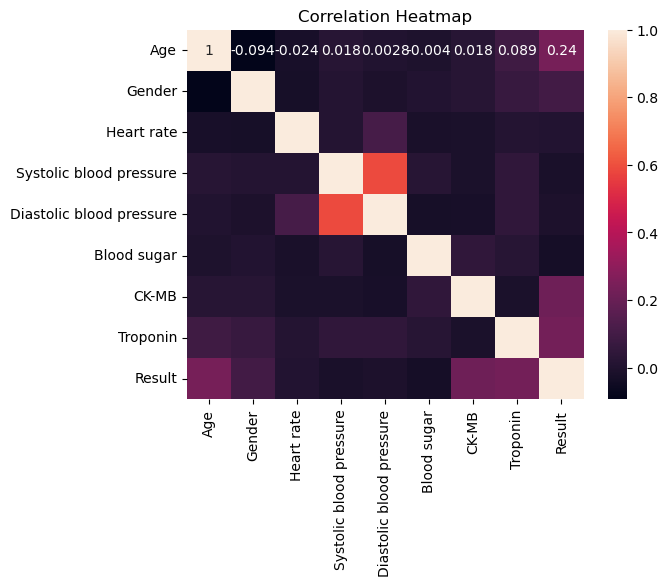

In [10]:
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

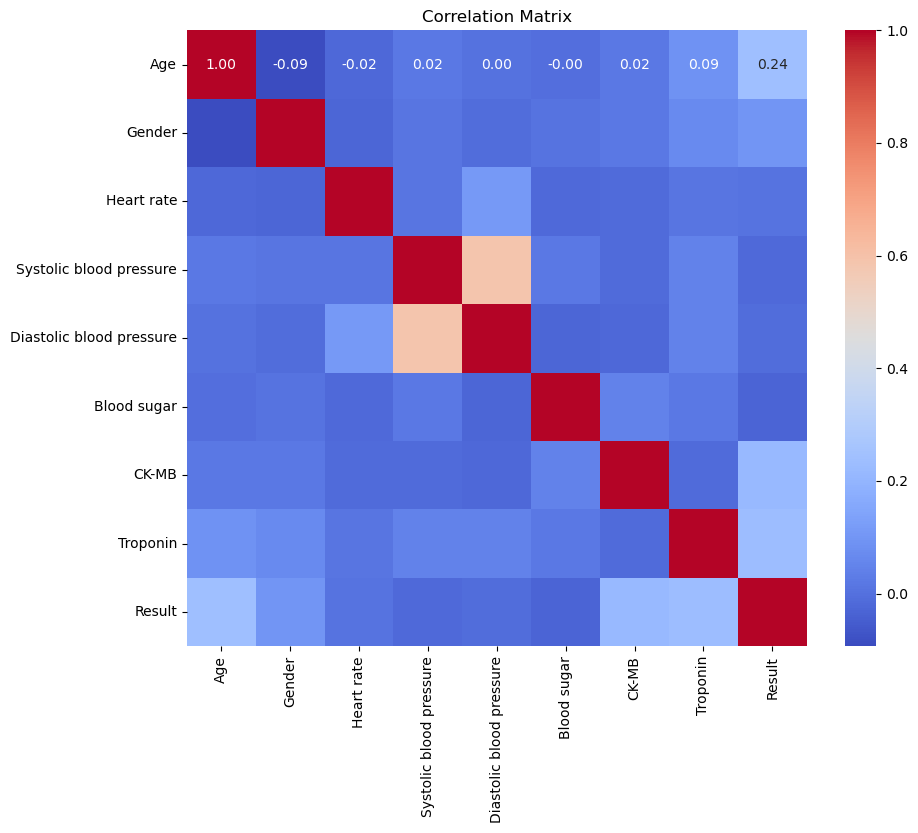

In [12]:
# Correlation 
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [13]:
data["Age"].value_counts()

Age
60     106
70      73
50      68
63      64
65      63
      ... 
91       1
88       1
100      1
14       1
84       1
Name: count, Length: 75, dtype: int64

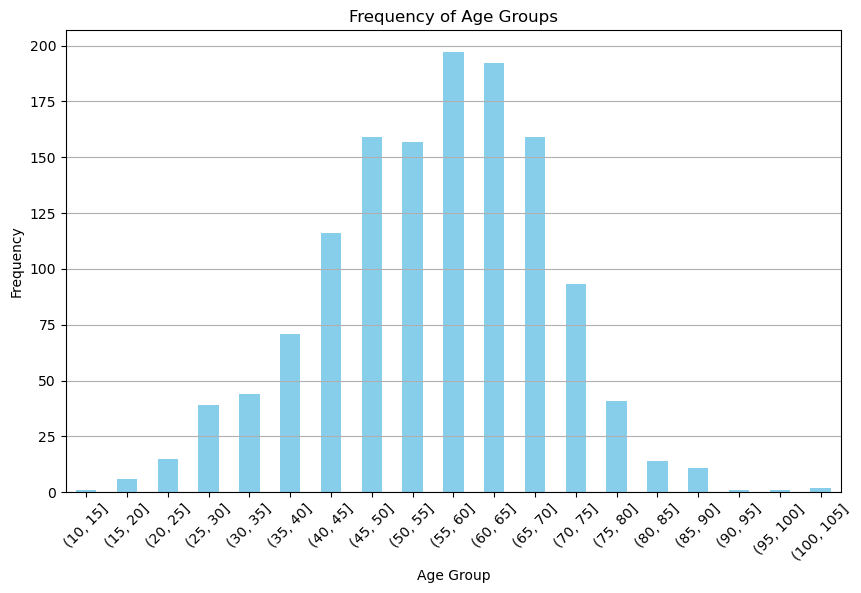

In [14]:

age_groups = pd.cut(data["Age"], bins=range(10, 110, 5))
age_counts = age_groups.value_counts().sort_index()


plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Frequency of Age Groups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

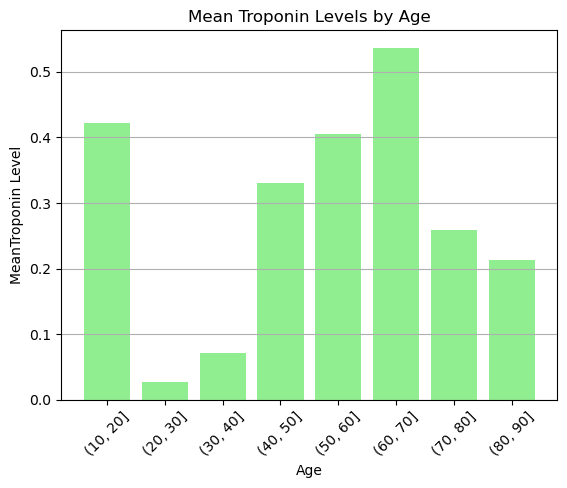

In [15]:
max_blood_sugar_by_age = data.groupby(pd.cut(data['Age'], bins=range(10, 100, 10)))['Troponin'].mean()


plt.bar(max_blood_sugar_by_age.index.astype(str), max_blood_sugar_by_age.values, color='lightgreen')
plt.xlabel('Age')
plt.ylabel('MeanTroponin Level')
plt.title('Mean Troponin Levels by Age')
plt.xticks(rotation=45)
plt.grid(axis='y')
warnings.filterwarnings("ignore", category=FutureWarning)
plt.show()

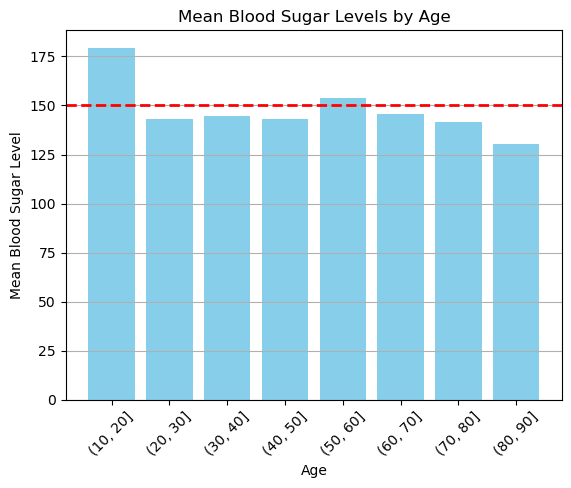

In [16]:
high_blood_sugar = data[data['Blood sugar'] > 150]

max_blood_sugar_by_age = data.groupby(pd.cut(data['Age'], bins=range(10, 100, 10)))['Blood sugar'].mean()


plt.bar(max_blood_sugar_by_age.index.astype(str), max_blood_sugar_by_age.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Mean Blood Sugar Level')
plt.title('Mean Blood Sugar Levels by Age')
plt.xticks(rotation=45)
plt.grid(axis='y')
warnings.filterwarnings("ignore", category=FutureWarning)
plt.axhline(y=150, color='red', linestyle='--', linewidth=2)
plt.show()

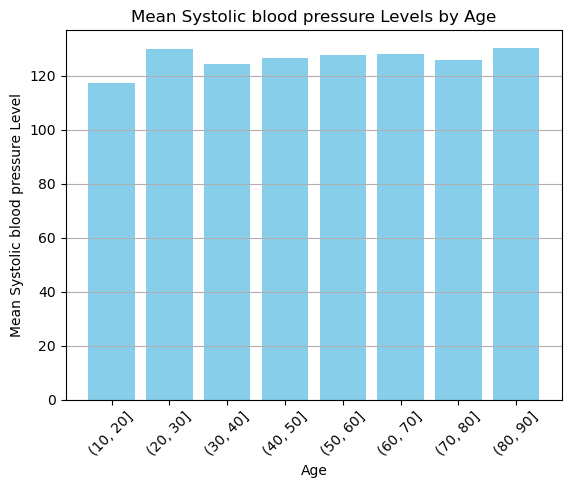

In [17]:
max_by_age = data.groupby(pd.cut(data['Age'], bins=range(10, 100, 10)))['Systolic blood pressure'].mean()


plt.bar(max_by_age.index.astype(str), max_by_age.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Mean Systolic blood pressure Level')
plt.title('Mean Systolic blood pressure Levels by Age')
plt.xticks(rotation=45)
plt.grid(axis='y')
warnings.filterwarnings("ignore", category=FutureWarning)
plt.show()

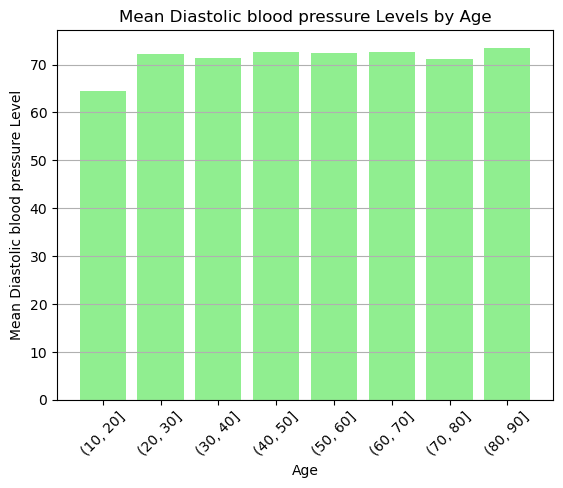

In [18]:
max_by_age = data.groupby(pd.cut(data['Age'], bins=range(10, 100, 10)))['Diastolic blood pressure'].mean()


plt.bar(max_by_age.index.astype(str), max_by_age.values, color="lightgreen")
plt.xlabel('Age')
plt.ylabel('Mean Diastolic blood pressure Level')
plt.title('Mean Diastolic blood pressure Levels by Age')
plt.xticks(rotation=45)
plt.grid(axis='y')
warnings.filterwarnings("ignore", category=FutureWarning)
plt.show()

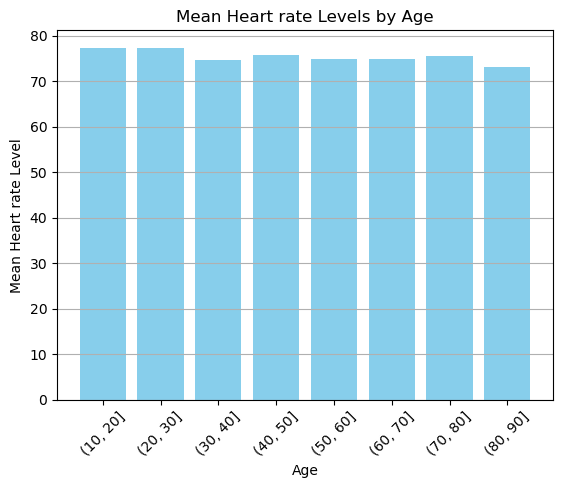

In [19]:
max_by_age = cleaned_data.groupby(pd.cut(cleaned_data['Age'], bins=range(10, 100, 10)))['Heart rate'].mean()


plt.bar(max_by_age.index.astype(str), max_by_age.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Mean Heart rate Level')
plt.title('Mean Heart rate Levels by Age')
plt.xticks(rotation=45)
plt.grid(axis='y')
warnings.filterwarnings("ignore", category=FutureWarning)
plt.show()

In [20]:
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,0
1,20,1,94,98,46,296.0,6.75,1.060,1
2,56,1,64,160,77,270.0,1.99,0.003,0
3,66,1,70,120,55,270.0,13.87,0.122,1
4,54,1,64,112,65,300.0,1.08,0.003,0


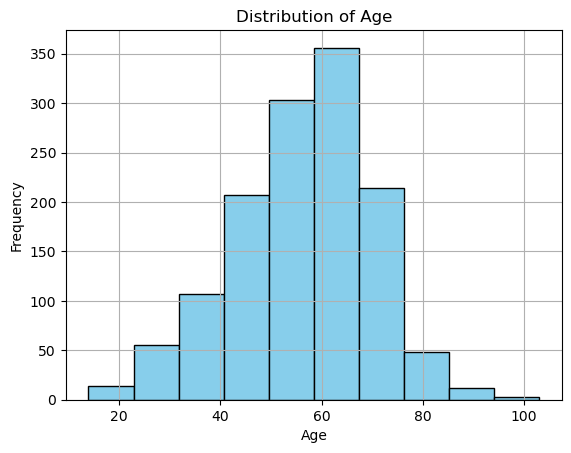

In [21]:
# Distribution of Age
plt.hist(data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(True)
plt.show()

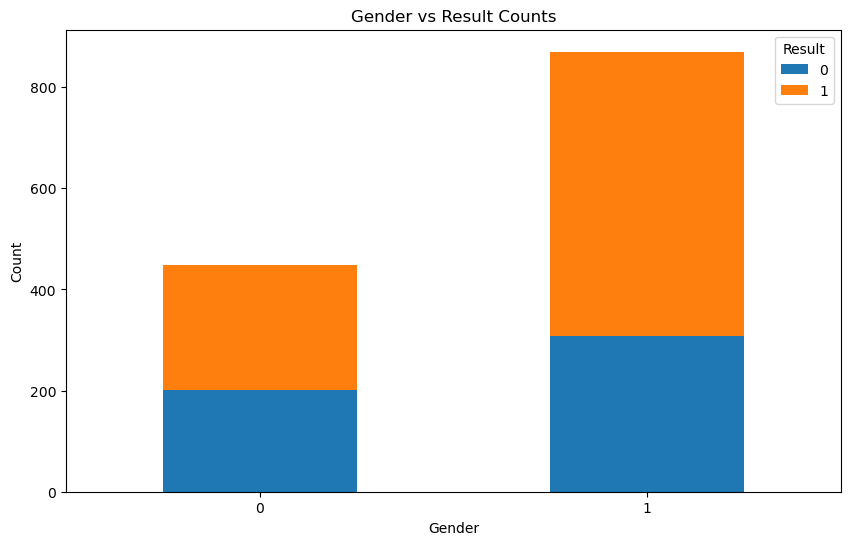

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cinsiyet bazında pozitif ve negatif sonuç sayılarını hesaplayın
gender_counts = data.groupby(['Gender', 'Result']).size().unstack()

# Grafik çizme
gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender vs Result Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Result', loc='upper right')
plt.show()

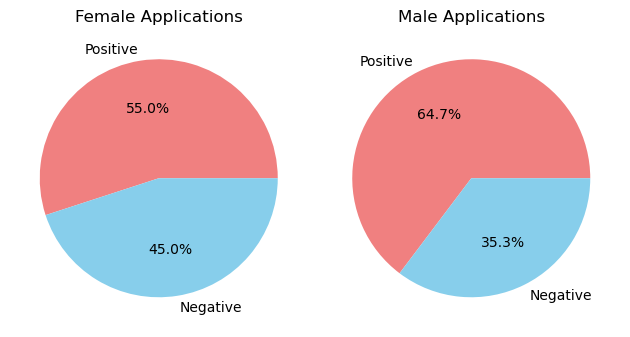

In [23]:
import matplotlib.pyplot as plt

# Separating the data for females and males
female_data = cleaned_data[cleaned_data['Gender'] == 0]
male_data = cleaned_data[cleaned_data['Gender'] == 1]

# Number of applications and negative result percentage for females
female_applications = len(female_data)
female_negative_percentage = (len(female_data[female_data['Result'] == 0]) / female_applications) * 100

# Number of applications and negative result percentage for males
male_applications = len(male_data)
male_negative_percentage = (len(male_data[male_data['Result'] == 0]) / male_applications) * 100

# Pie chart for females
plt.subplot(1, 2, 1)
plt.pie([female_applications - len(female_data[female_data['Result'] == 0]), len(female_data[female_data['Result'] == 0])],
        labels=['Positive', 'Negative'], autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Female Applications')

# Pie chart for males
plt.subplot(1, 2, 2)
plt.pie([male_applications - len(male_data[male_data['Result'] == 0]), len(male_data[male_data['Result'] == 0])],
        labels=['Positive', 'Negative'], autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Male Applications')

plt.tight_layout()
plt.show()


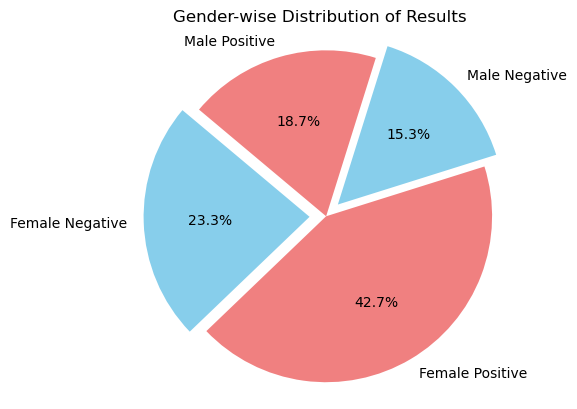

In [24]:


# Count the number of female and male applicants
gender_counts = data['Gender'].value_counts()

# Count the number of negative results among female and male applicants
female_negative = data[(data['Gender'] == 1) & (data['Result'] == 0)]['Gender'].count()
male_negative = data[(data['Gender'] == 0) & (data['Result'] == 0)]['Gender'].count()

# Calculate the percentages based on the total number of applicants
female_percentage = (female_negative / gender_counts[1]) * 100
male_percentage = (male_negative / gender_counts[0]) * 100

# Visualize the results using a pie chart
labels = ['Female Negative', 'Female Positive', 'Male Negative', 'Male Positive']
sizes = [female_negative, gender_counts[1] - female_negative, male_negative, gender_counts[0] - male_negative]
colors = ['skyblue', 'lightcoral', 'skyblue', 'lightcoral']
explode = (0.1, 0, 0.1, 0)  # Explode slices to highlight negative cases

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Gender-wise Distribution of Results')
plt.show()


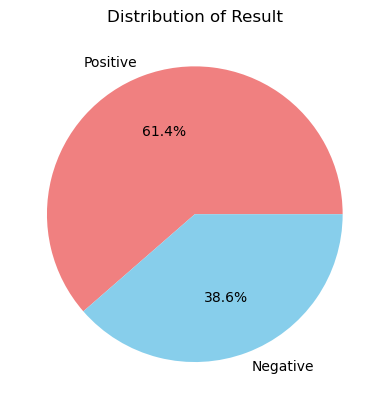

In [25]:
# Class distribution of result column
plt.pie(data['Result'].value_counts(), labels=['Positive','Negative'], autopct='%1.1f%%', colors=[ 'lightcoral','skyblue',])
plt.title('Distribution of Result')
plt.show()


Text(0, 0.5, 'Blod sugar')

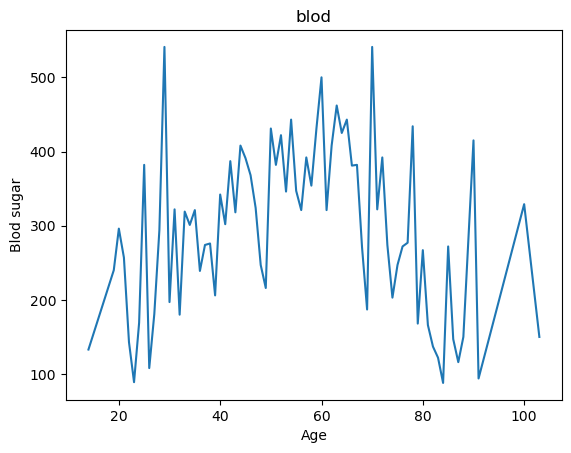

In [26]:
blod=data.groupby(by=["Age"])["Blood sugar"].max()
plt.plot (blod)
plt.title('blod')
plt.xlabel('Age')
plt.ylabel('Blod sugar')

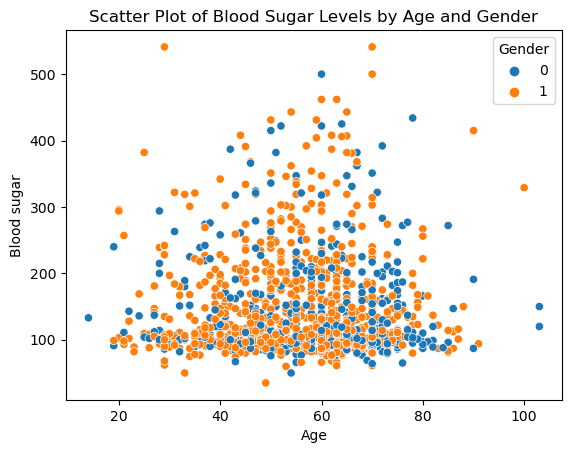

In [27]:
sns.scatterplot(data=data, x='Age', y='Blood sugar', hue='Gender')
plt.title('Scatter Plot of Blood Sugar Levels by Age and Gender')
plt.show()

In [28]:
data.head(2)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,0
1,20,1,94,98,46,296.0,6.75,1.060,1


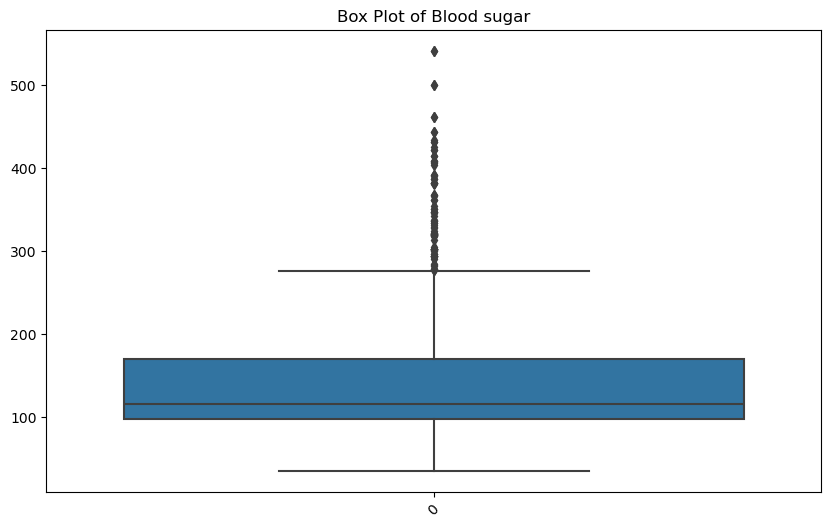

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.boxplot(data=data["Blood sugar"])
plt.title("Box Plot of Blood sugar")
plt.xticks(rotation=45) 
plt.show()

<Axes: xlabel='Gender', ylabel='Blood sugar'>

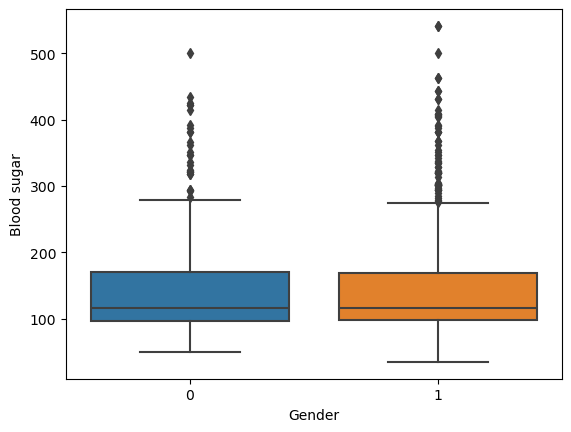

In [30]:
sns.boxplot(data=data, x='Gender', y='Blood sugar')


<a id="5"></a><br>
> ## **5. Modeling**

## LogisticRegression

In [31]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
  
X = cleaned_data.drop("Result",axis=1)
y = cleaned_data["Result"]

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


In [32]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')


F1 Score: 0.8504983388704319


In [33]:
# Calculate Gini coefficient (using ROC AUC)
roc_auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * roc_auc - 1
print(f'Gini Score: {gini}')

Gini Score: 0.8283426028921022


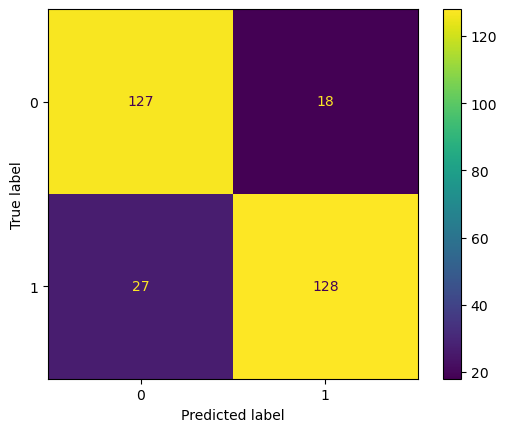

In [34]:

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

y_pred = model.predict(X_test)
matr = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(matr)
disp.plot()

## RandomForestClassifier

In [35]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

X = cleaned_data.drop("Result",axis=1)
y = cleaned_data["Result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 98   3]
 [  2 161]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



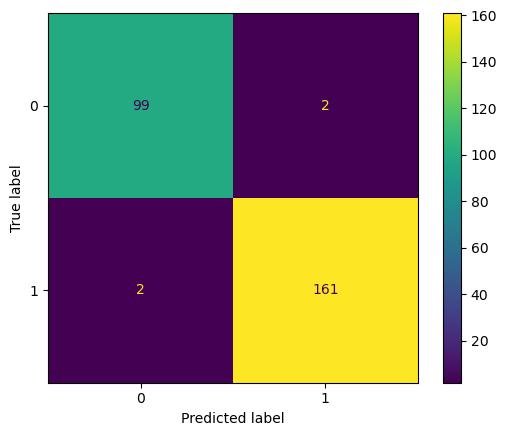

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()

## Grid search Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np 

train, test = train_test_split(cleaned_data, test_size=0.2, random_state=42)

train_x = train[["Age","Gender","Heart rate","Systolic blood pressure",
                 "Diastolic blood pressure","Blood sugar","CK-MB","Troponin"]]

train_y = train[["Result"]]


test_x = test[["Age","Gender","Heart rate","Systolic blood pressure",
                 "Diastolic blood pressure","Blood sugar","CK-MB","Troponin"]]

test_y = test[["Result"]]


In [38]:

depth = []
r_test = []
r_tr = []
for i in range(2,11):
    rf_regressor = RandomForestRegressor(n_estimators = 50, max_depth = i, random_state=42)

    rf_regressor.fit(train_x, train_y)
   
    pred_train = rf_regressor.predict(train_x)
    pred_test = rf_regressor.predict(test_x)
    
    depth.append(i)
    
    r2_train = r2_score(train_y, pred_train)
    
    r_tr.append(r2_train)
    

    r2_test = r2_score(test_y, pred_test)
    r_test.append(r2_test)


depth = pd.DataFrame(depth).rename(columns = {0:"depth"})
r2_train  = pd.DataFrame(r_tr).rename(columns = {0:"r2_train"})
r2_test  = pd.DataFrame(r_test).rename(columns = {0:"r2_test"})
report = pd.concat([depth,r2_train,r2_test],axis=1)

report["diff"] = abs(report["r2_train"] - report["r2_test"])
report[report["diff"] == report["diff"].min()]

C:\Users\user\anaconda32\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda32\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda32\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda32\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

,depth,r2_train,r2_test,diff
0,2,0.956539,0.924347,0.032192


In [39]:
depth = []
r_train = []
r_test = []


for i in range(2, 11):
    rf_regressor = RandomForestRegressor(n_estimators=50, max_depth=i, random_state=42)
    rf_regressor.fit(train_x, train_y)
    
    pred_train = rf_regressor.predict(train_x)
    pred_test = rf_regressor.predict(test_x)
    
    depth.append(i)
    r_train.append(r2_score(train_y, pred_train))
    r_test.append(r2_score(test_y, pred_test))


results_df = pd.DataFrame({'depth': depth, 'r2_train': r_train, 'r2_test': r_test})


results_df['diff'] = abs(results_df['r2_train'] - results_df['r2_test'])

results_df

C:\Users\user\anaconda32\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda32\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda32\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda32\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

,depth,r2_train,r2_test,diff
0,2,0.956539,0.924347,0.032192
1,3,0.968396,0.913862,0.054534
2,4,0.989031,0.922885,0.066146
3,5,0.993554,0.922616,0.070938
4,6,0.994373,0.920814,0.073558
5,7,0.994573,0.919493,0.075080
6,8,0.994573,0.919493,0.075080
7,9,0.994573,0.919493,0.075080
8,10,0.994573,0.919493,0.075080


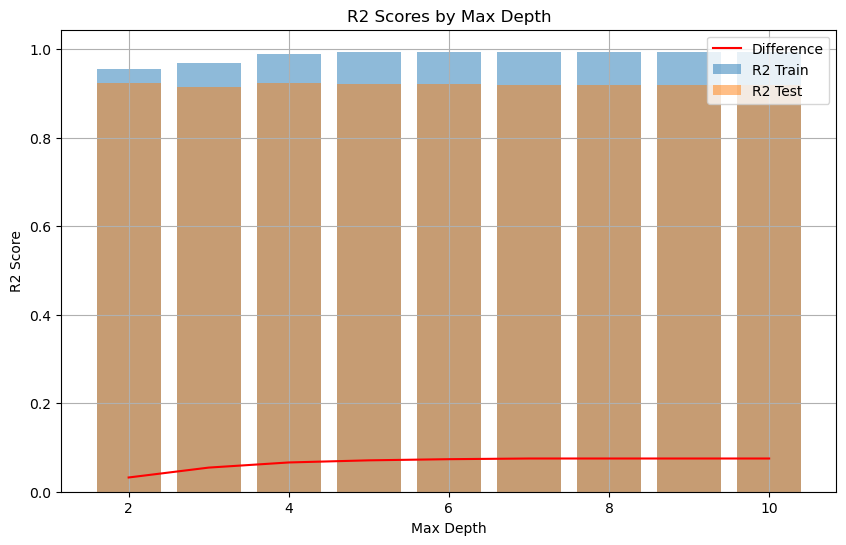

In [40]:

plt.figure(figsize=(10, 6))
plt.bar(results_df['depth'], results_df['r2_train'], label='R2 Train', alpha=0.5)
plt.bar(results_df['depth'], results_df['r2_test'], label='R2 Test', alpha=0.5)
plt.plot(results_df['depth'], results_df['diff'], color='r', label='Difference')

plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('R2 Scores by Max Depth')
plt.legend()
plt.grid(True)

plt.show()

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

X = cleaned_data.drop("Result", axis=1)
y = cleaned_data["Result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(1, 7)), 'max_features': list(range(1,7))}]
clf = GridSearchCV(rfc, forest_params, cv = 2, scoring='accuracy')


clf.fit(X_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

{'max_depth': 6, 'max_features': 1}
0.9876822063136105


In [42]:
for i in range(1, 7):
    forest_params = [{'max_depth': [i], 'max_features': list(range(1,7))}]
    clf = GridSearchCV(rfc, forest_params, cv=2, scoring='accuracy')
    clf.fit(X_train, y_train)
    print(f"Max Depth: {i}, Best Params: {clf.best_params_}, Best Score: {clf.best_score_}")

Max Depth: 1, Best Params: {'max_depth': 1, 'max_features': 3}, Best Score: 0.9640043700764764
Max Depth: 2, Best Params: {'max_depth': 2, 'max_features': 5}, Best Score: 0.9867316428037491
Max Depth: 3, Best Params: {'max_depth': 3, 'max_features': 2}, Best Score: 0.9857864700132253
Max Depth: 4, Best Params: {'max_depth': 4, 'max_features': 2}, Best Score: 0.9848377034098097
Max Depth: 5, Best Params: {'max_depth': 5, 'max_features': 6}, Best Score: 0.9867334397101949
Max Depth: 6, Best Params: {'max_depth': 6, 'max_features': 1}, Best Score: 0.9867352366166409
